In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging 
import seaborn as sns


# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [3]:
# Create logger
logger = logging.getLogger('my_logger')
logger.setLevel(logging.DEBUG)

# File handler
file_handler = logging.FileHandler('app.log')
file_handler.setLevel(logging.DEBUG)

# Console handler
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)

# Formatter
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
file_handler.setFormatter(formatter)
console_handler.setFormatter(formatter)

# Add handlers to logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)

# Sample logs
logger.info("Logging to both console and file.")
logger.error("An error occurred.")



def load_and_log_iris_data():
    logger.info("Loading the Iris dataset")
    iris = load_iris()
    iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    logger.debug("Iris dataset loaded successfully")

2025-04-24 22:42:42,019 - INFO - Logging to both console and file.
2025-04-24 22:42:42,030 - ERROR - An error occurred.


In [7]:
df= pd.read_csv("telecom.csv")

In [9]:
df.head(5)

Bearer Id            Start  Start ms              End  End ms  \
0  1.310000e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.310000e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.310000e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.310000e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.310000e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
0  1823652.0  2.082010e+14   3.366496e+10  3.552120e+13           9.16E+15   
1  1365104.0  2.082020e+14   3.368185e+10  3.579400e+13            L77566A   
2  1361762.0  2.082000e+14   3.376063e+10  3.528150e+13            D42335A   
3  1321509.0  2.082010e+14   3.375034e+10  3.535660e+13            T21824A   
4  1089009.0  2.082010e+14   3.369980e+10  3.540700e+13            D88865A   

   ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  ...          15854611.0           2501332.0           8198936.0   
1  ...          20247395.0          19111729.0          18338413.0   
2  ...          19725661.0          14699576.0          17587794.0   
3  ...          21388122.0          15146643.0          13994646.0   
4  ...          15259380.0          18962873.0          17124581.0   

   Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other DL (Bytes)  \
0           9656251.0        278082303.0         14344150.0       171744450.0   
1          17227132.0        608750074.0          1170709.0       526904238.0   
2           6163408.0        229584621.0           395630.0       410692588.0   
3           1097942.0        799538153.0         10849722.0       749039933.0   
4            415218.0        527707248.0          3529801.0       550709500.0   

   Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
0         8814393.0        36749741.0       308879636.0  
1        15055145.0        53800391.0       653384965.0  
2         4215763.0        27883638.0       279807335.0  
3        12797283.0        43324218.0       846028530.0  
4        13910322.0        38542814.0       569138589.0  

[5 rows x 55 columns]

In [11]:
df.tail(5)

Bearer Id           Start  Start ms              End  End ms  \
149996  7.280000e+18  4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.350000e+18  4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.310000e+19  4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.310000e+19  4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             NaN       NaN              NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
149996    81230.0  2.082020e+14   3.365069e+10  3.548310e+13   
149997    97970.0  2.082020e+14   3.366345e+10  3.566050e+13   
149998    98249.0  2.082020e+14   3.362189e+10  3.572120e+13   
149999    97910.0  2.082020e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
149996            D20434A  ...          16191667.0         11763428.00   
149997            D10223C  ...          13877234.0          8288284.00   
149998            T51102A  ...          22660510.0          1855903.00   
149999            L88342B  ...           8817106.0          8305402.00   
150000                NaN  ...          11634072.5         11009410.13   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
149996         17883703.00         19678161.00        526609673.0   
149997         19350146.00         21293148.00        626893062.0   
149998          9963942.00          5065760.00        553539484.0   
149999          3322253.00         13172589.00        352536971.0   
150000         11626851.72         11001754.82        422044702.6   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
149996       9.197207e+06         3264510.0      1.348742e+07   
149997       4.735033e+06       712180387.0      2.457758e+06   
149998       1.339432e+07       121100856.0      1.131473e+07   
149999       2.529475e+06       814713113.0      1.406930e+06   
150000       8.288398e+06       421100544.2      8.264799e+06   

        Total UL (Bytes)  Total DL (Bytes)  
149996        57628851.0       574175259.0  
149997        39135081.0       666648844.0  
149998        34912224.0       592786405.0  
149999        29626096.0       371895920.0  
150000               NaN               NaN  

[5 rows x 55 columns]

In [13]:
df.tail(5)

Bearer Id           Start  Start ms              End  End ms  \
149996  7.280000e+18  4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.350000e+18  4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.310000e+19  4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.310000e+19  4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             NaN       NaN              NaN     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
149996    81230.0  2.082020e+14   3.365069e+10  3.548310e+13   
149997    97970.0  2.082020e+14   3.366345e+10  3.566050e+13   
149998    98249.0  2.082020e+14   3.362189e+10  3.572120e+13   
149999    97910.0  2.082020e+14   3.361962e+10  8.618620e+13   
150000        NaN           NaN            NaN           NaN   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
149996            D20434A  ...          16191667.0         11763428.00   
149997            D10223C  ...          13877234.0          8288284.00   
149998            T51102A  ...          22660510.0          1855903.00   
149999            L88342B  ...           8817106.0          8305402.00   
150000                NaN  ...          11634072.5         11009410.13   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
149996         17883703.00         19678161.00        526609673.0   
149997         19350146.00         21293148.00        626893062.0   
149998          9963942.00          5065760.00        553539484.0   
149999          3322253.00         13172589.00        352536971.0   
150000         11626851.72         11001754.82        422044702.6   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
149996       9.197207e+06         3264510.0      1.348742e+07   
149997       4.735033e+06       712180387.0      2.457758e+06   
149998       1.339432e+07       121100856.0      1.131473e+07   
149999       2.529475e+06       814713113.0      1.406930e+06   
150000       8.288398e+06       421100544.2      8.264799e+06   

        Total UL (Bytes)  Total DL (Bytes)  
149996        57628851.0       574175259.0  
149997        39135081.0       666648844.0  
149998        34912224.0       592786405.0  
149999        29626096.0       371895920.0  
150000               NaN               NaN  

[5 rows x 55 columns]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [17]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [19]:
# Safely fill missing values with mode for specified columns
mode_fill_columns = [
    'Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
    'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
    'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
    '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)',
    'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
    'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL',
    'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B',
    'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B',
    'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B',
    'Nb of sec with Vol UL < 1250B','Total UL (Bytes)','Total DL (Bytes)' 
]

# Fill only if column exists
for col in mode_fill_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        print(f"Column not found: {col}")

In [21]:
df.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

In [23]:
df.describe()

Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.500010e+05  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean   1.010721e+19     499.187145     498.803368  1.046084e+05  2.082017e+14   
std    2.877858e+18     288.611161     288.098304  8.103736e+04  2.145202e+10   
min    6.920000e+18       0.000000       0.000000  7.142000e+03  2.040470e+14   
25%    7.350000e+18     250.000000     251.000000  5.744200e+04  2.082010e+14   
50%    7.350000e+18     499.000000     500.000000  8.639900e+04  2.082020e+14   
75%    1.300000e+19     749.000000     750.000000  1.324300e+05  2.082020e+14   
max    1.320000e+19     999.000000     999.000000  1.859336e+06  2.140740e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.182414e+10  4.861907e+13        94.620523        15.315031   
std     2.438731e+12  2.249522e+13       560.245617        76.687998   
min     3.360100e+10  4.400150e+11         0.000000         0.000000   
25%     3.365094e+10  3.546260e+13        28.000000         3.000000   
50%     3.366361e+10  3.572240e+13        38.000000         5.000000   
75%     3.368307e+10  8.615230e+13        62.000000        11.000000   
max     8.823970e+14  9.900120e+13     96923.000000      7120.000000   

       Avg Bearer TP DL (kbps)  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
count            150001.000000  ...        1.500010e+05        1.500010e+05   
mean              13299.957414  ...        1.163407e+07        1.100941e+07   
std               23971.823147  ...        6.710569e+06        6.345423e+06   
min                   0.000000  ...        5.300000e+01        1.050000e+02   
25%                  43.000000  ...        5.833501e+06        5.517965e+06   
50%                  63.000000  ...        1.161602e+07        1.101345e+07   
75%               19710.000000  ...        1.744852e+07        1.651556e+07   
max              378160.000000  ...        2.325910e+07        2.201196e+07   

       Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
count        1.500010e+05        1.500010e+05       1.500010e+05   
mean         1.162685e+07        1.100175e+07       4.220447e+08   
std          6.725218e+06        6.359490e+06       2.439675e+08   
min          4.200000e+01        3.500000e+01       2.516000e+03   
25%          5.777156e+06        5.475981e+06       2.104733e+08   
50%          1.164222e+07        1.099638e+07       4.234081e+08   
75%          1.747048e+07        1.650727e+07       6.331742e+08   
max          2.325919e+07        2.201196e+07       8.434419e+08   

       Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
count       1.500010e+05      1.500010e+05      1.500010e+05   
mean        8.288398e+06      4.211005e+08      8.264799e+06   
std         4.782700e+06      2.432050e+08      4.769004e+06   
min         5.900000e+01      3.290000e+03      1.480000e+02   
25%         4.128476e+06      2.101869e+08      4.145943e+06   
50%         8.291208e+06      4.218030e+08      8.267071e+06   
75%         1.243162e+07      6.316918e+08      1.238415e+07   
max         1.655879e+07      8.434425e+08      1.655882e+07   

       Total UL (Bytes)  Total DL (Bytes)  
count      1.500010e+05      1.500010e+05  
mean       4.112106e+07      4.546409e+08  
std        1.127649e+07      2.441440e+08  
min        2.866892e+06      7.114041e+06  
25%        3.322196e+07      2.431057e+08  
50%        4.114324e+07      4.558409e+08  
75%        4.903424e+07      6.657051e+08  
max        7.833131e+07      9.029696e+08  

[8 rows x 50 columns]

In [25]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [27]:
df.shape

(150001, 55)

In [29]:
df.duplicated().sum()

0

In [31]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [33]:
plt.figure(figsize=(10,6))
plt.title('Data Distribution')
plt.hist(df['Avg Bearer TP DL (kbps)'], bins=30, color='blue', alpha=0.7)
plt.xlabel('Avg Bearer TP DL (kbps)')
plt.ylabel('Frecuency')
plt.show()

In [37]:
import math

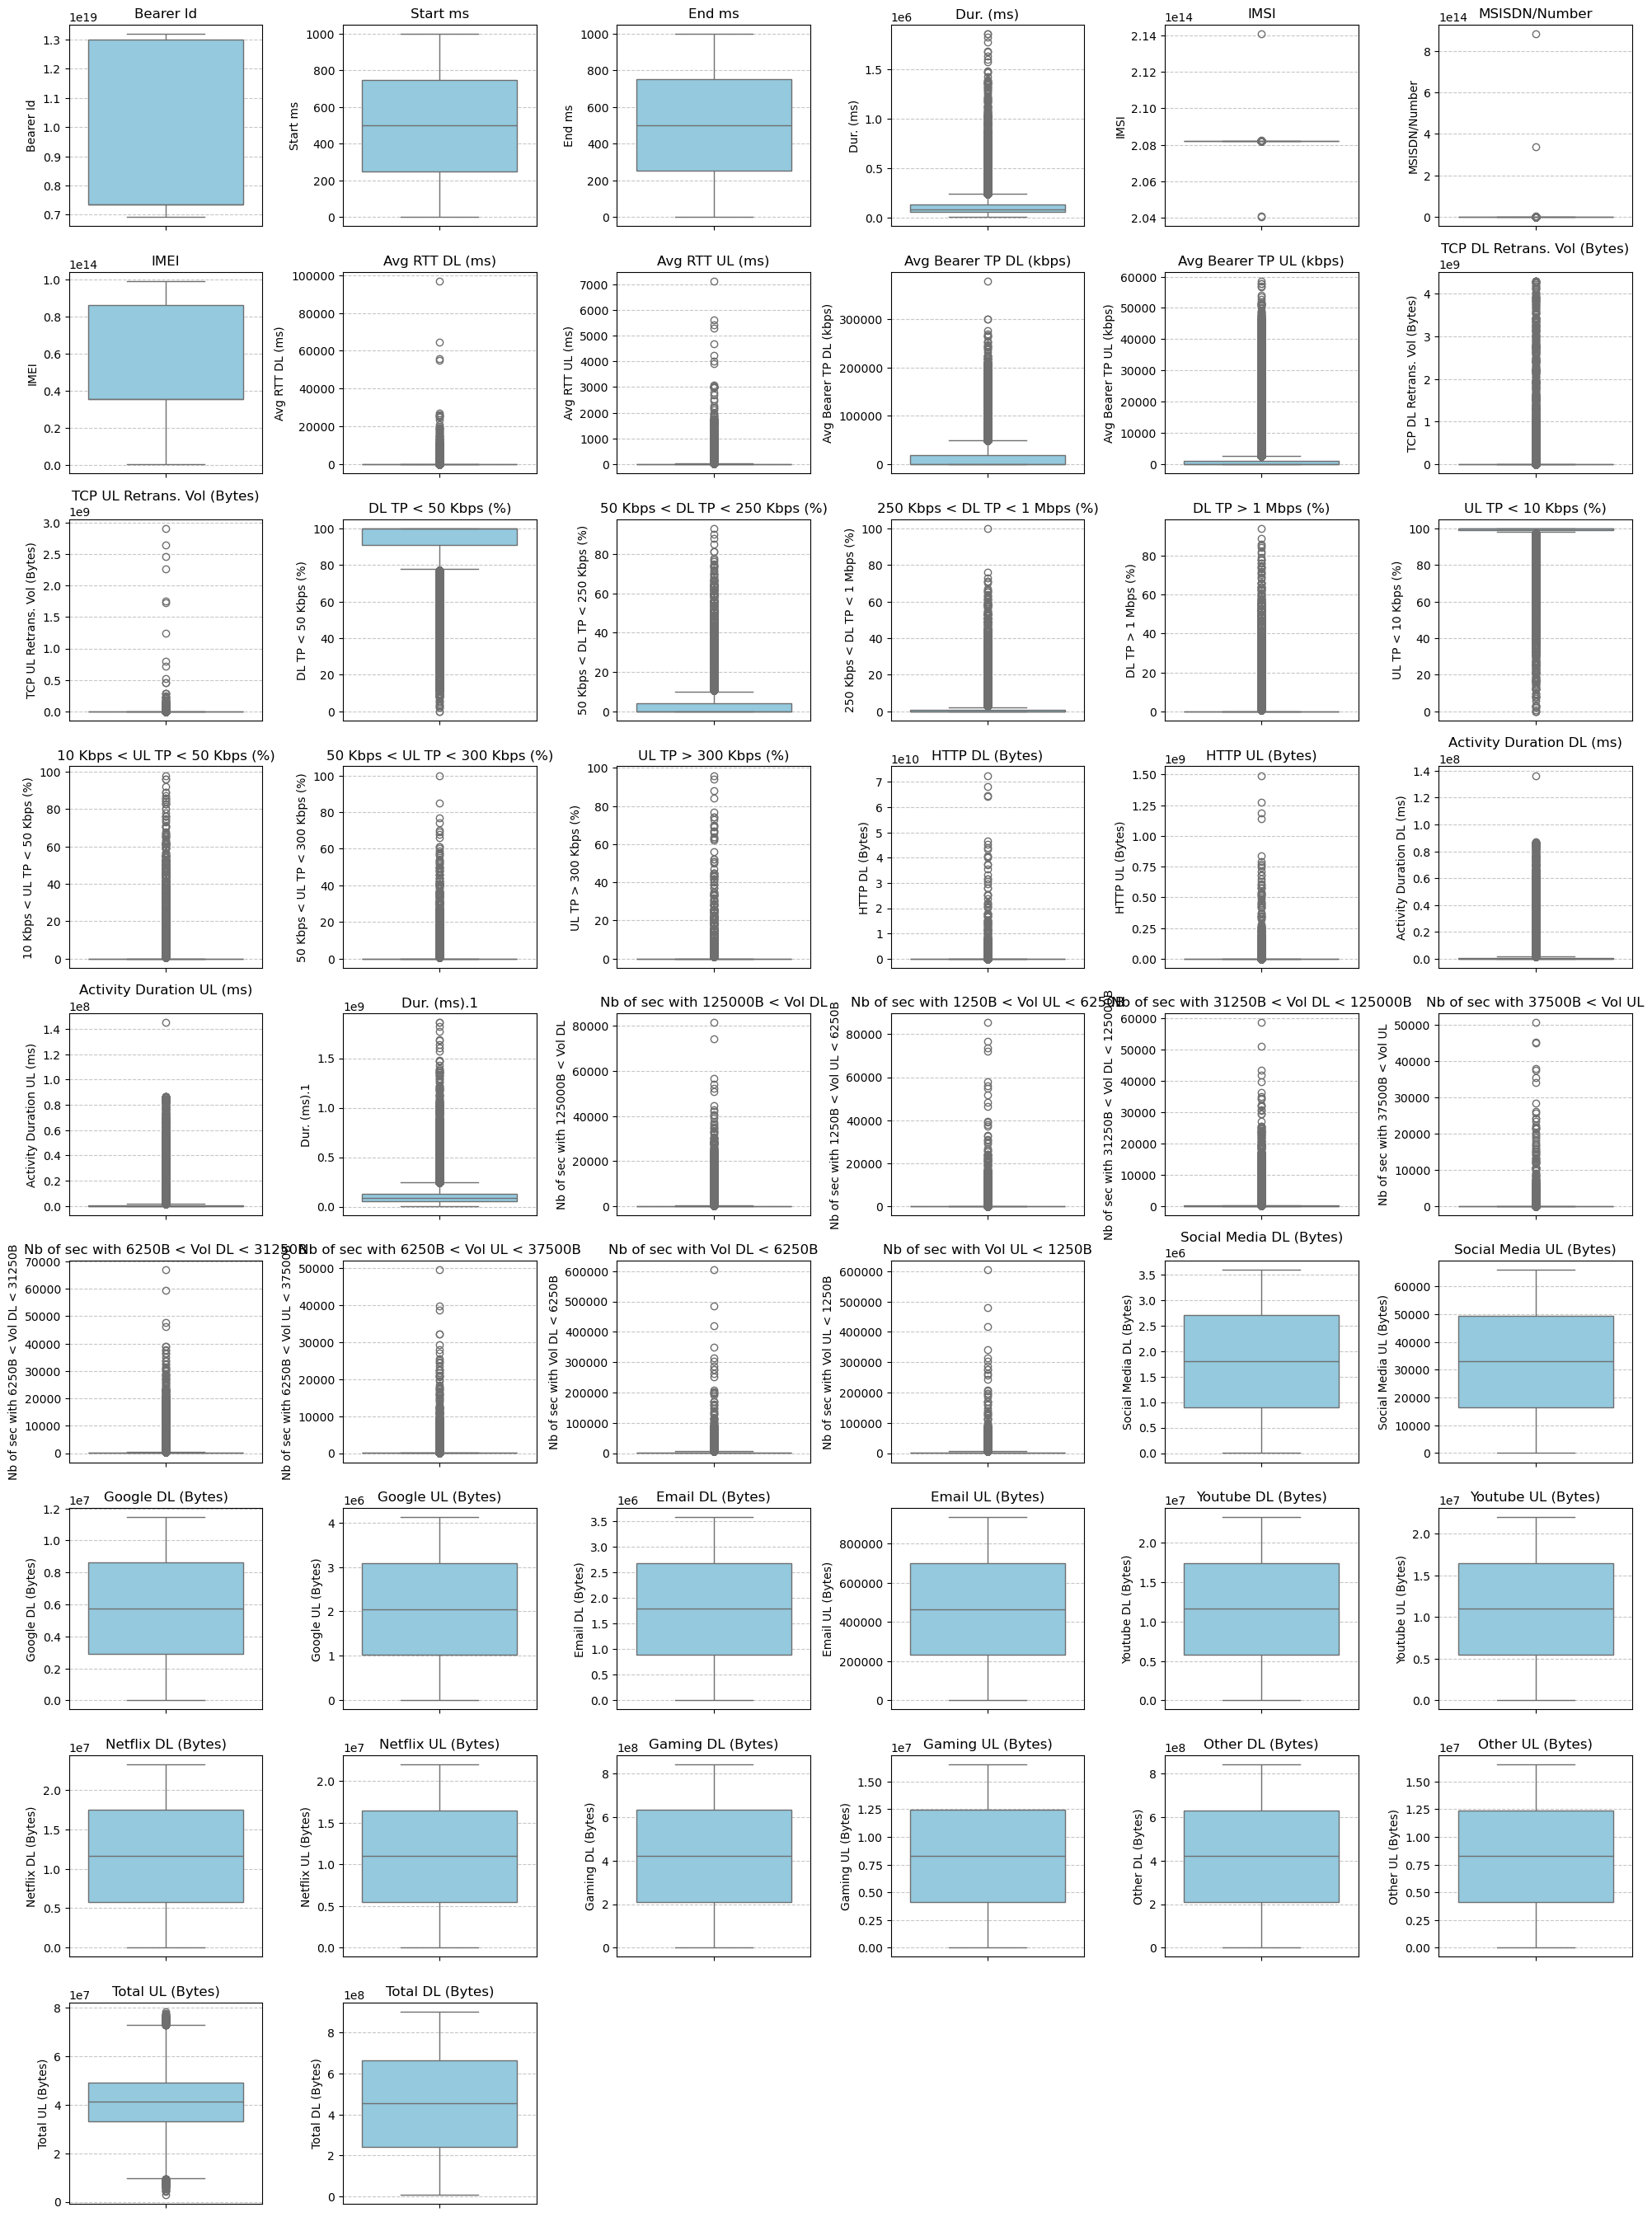

In [39]:
# Select only numerical columns
numerical = df.select_dtypes(include=['number']).columns

num_cols = 6  # Number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Compute number of row

plt.figure(figsize=(20, num_rows * 3))  # Adjust figure size dynamically

for i, col in enumerate(numerical, 1):  # Loop through numerical columns
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col], color='skyblue')  # Add color for better visuals
    plt.title(col)
    plt.xlabel('')  # Remove x-axis label for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

In [41]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


<Axes: ylabel='Dur. (ms)'>

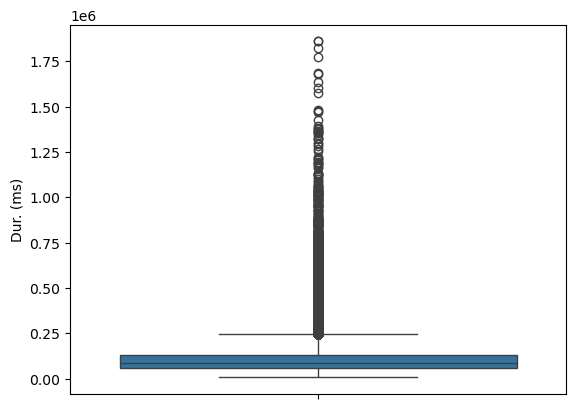

In [43]:
sns.boxplot(df['Dur. (ms)'])

In [45]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Dur. (ms)'])
df['Dur. (ms)'] = np.where(df['Dur. (ms)']>upper_limit_iqr,upper_limit_iqr,np.where(df['Dur. (ms)']<lower_limit_iqr,lower_limit_iqr,df['Dur. (ms)']))

<Axes: ylabel='Dur. (ms)'>

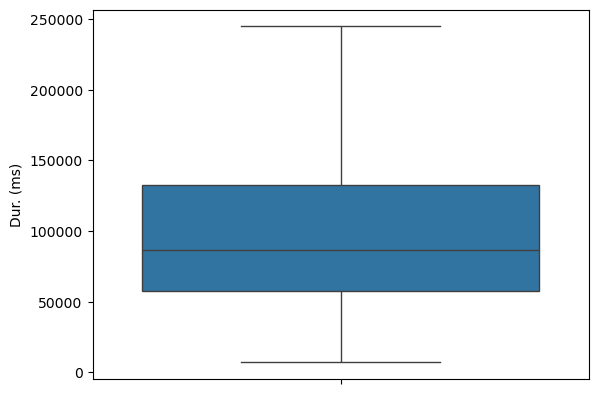

In [47]:
sns.boxplot(df['Dur. (ms)'])

<Axes: ylabel='Avg Bearer TP DL (kbps)'>

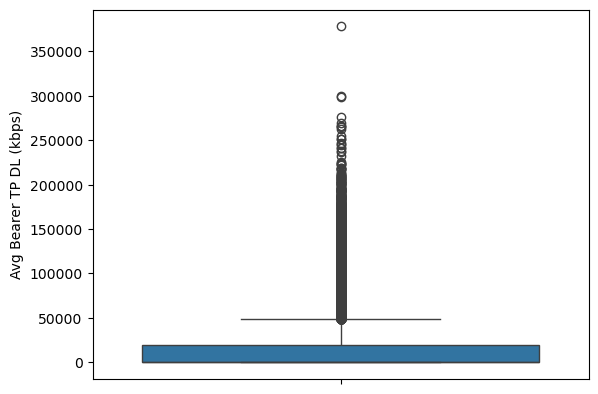

In [49]:
sns.boxplot(df['Avg Bearer TP DL (kbps)'])

In [51]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Avg Bearer TP DL (kbps)'])
df['Avg Bearer TP DL (kbps)'] = np.where(df['Avg Bearer TP DL (kbps)']>upper_limit_iqr,upper_limit_iqr,np.where(df['Avg Bearer TP DL (kbps)']<lower_limit_iqr,lower_limit_iqr,df['Avg Bearer TP DL (kbps)']))

<Axes: ylabel='Avg Bearer TP DL (kbps)'>

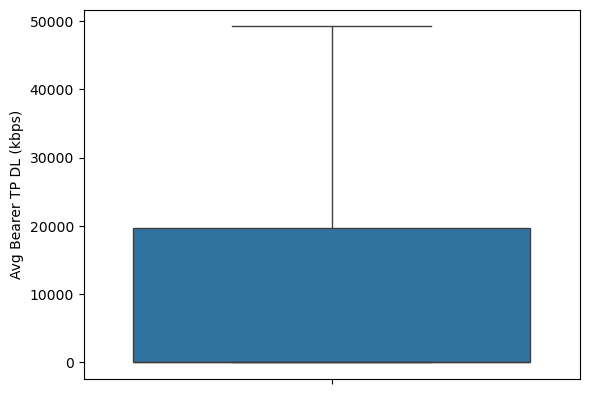

In [53]:
sns.boxplot(df['Avg Bearer TP DL (kbps)'])

<Axes: ylabel='DL TP < 50 Kbps (%)'>

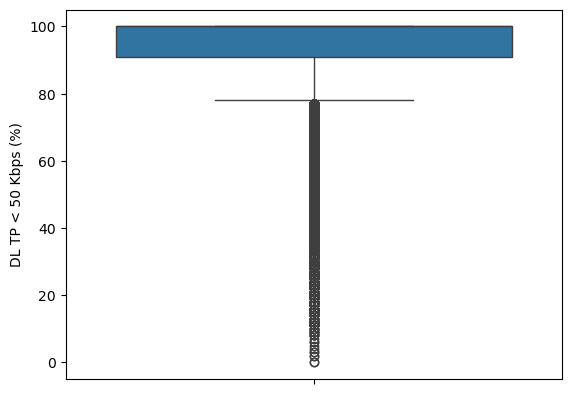

In [55]:
sns.boxplot(df['DL TP < 50 Kbps (%)'])

In [57]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['DL TP < 50 Kbps (%)'])
df['DL TP < 50 Kbps (%)'] = np.where(df['DL TP < 50 Kbps (%)']>upper_limit_iqr,upper_limit_iqr,np.where(df['DL TP < 50 Kbps (%)']<lower_limit_iqr,lower_limit_iqr,df['DL TP < 50 Kbps (%)']))

<Axes: ylabel='DL TP < 50 Kbps (%)'>

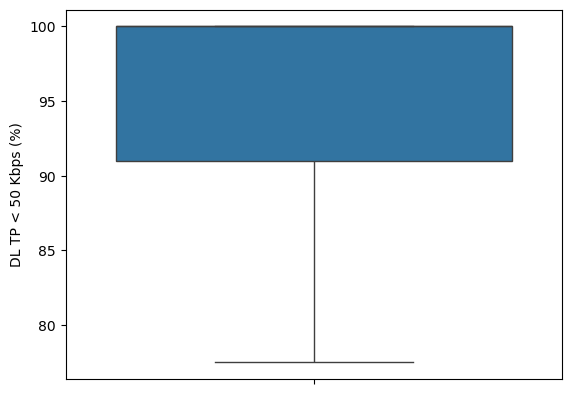

In [59]:
sns.boxplot(df['DL TP < 50 Kbps (%)'])

<Axes: ylabel='50 Kbps < DL TP < 250 Kbps (%)'>

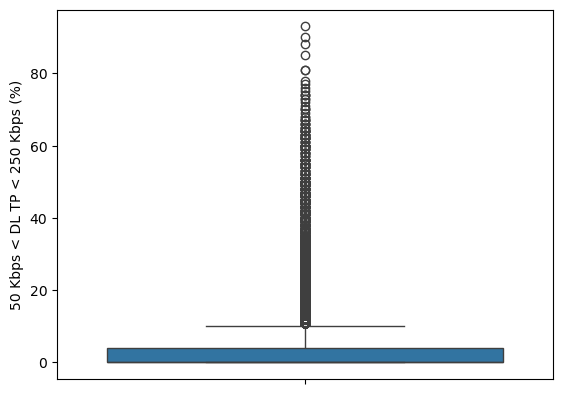

In [61]:
sns.boxplot(df['50 Kbps < DL TP < 250 Kbps (%)'])

In [63]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['50 Kbps < DL TP < 250 Kbps (%)'])
df['50 Kbps < DL TP < 250 Kbps (%)'] = np.where(df['50 Kbps < DL TP < 250 Kbps (%)']>upper_limit_iqr,upper_limit_iqr,np.where(df['50 Kbps < DL TP < 250 Kbps (%)']<lower_limit_iqr,lower_limit_iqr,df['50 Kbps < DL TP < 250 Kbps (%)']))

<Axes: ylabel='50 Kbps < DL TP < 250 Kbps (%)'>

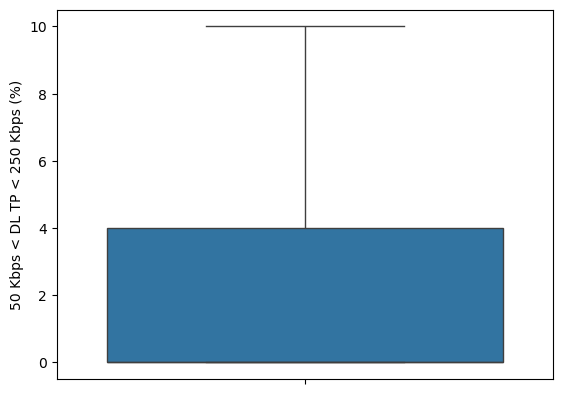

In [65]:
sns.boxplot(df['50 Kbps < DL TP < 250 Kbps (%)'])

<Axes: ylabel='TCP UL Retrans. Vol (Bytes)'>

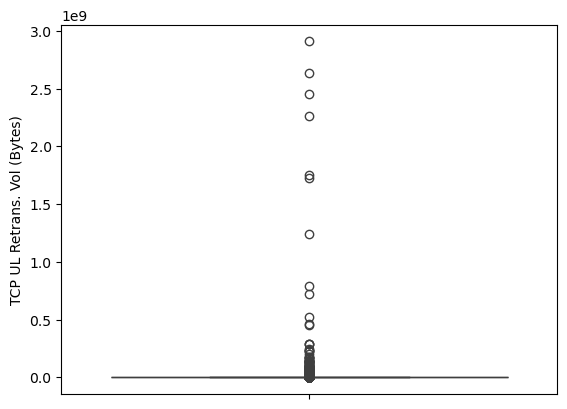

In [67]:
sns.boxplot(df['TCP UL Retrans. Vol (Bytes)'])

<Axes: ylabel='TCP DL Retrans. Vol (Bytes)'>

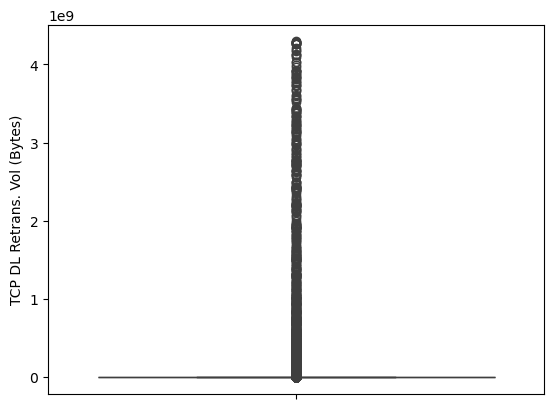

In [69]:
sns.boxplot(df['TCP DL Retrans. Vol (Bytes)'])

In [71]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['TCP DL Retrans. Vol (Bytes)'])
df['TCP DL Retrans. Vol (Bytes)'] = np.where(df['TCP DL Retrans. Vol (Bytes)']>upper_limit_iqr,upper_limit_iqr,np.where(df['TCP DL Retrans. Vol (Bytes)']<lower_limit_iqr,lower_limit_iqr,df['TCP DL Retrans. Vol (Bytes)']))

<Axes: ylabel='TCP DL Retrans. Vol (Bytes)'>

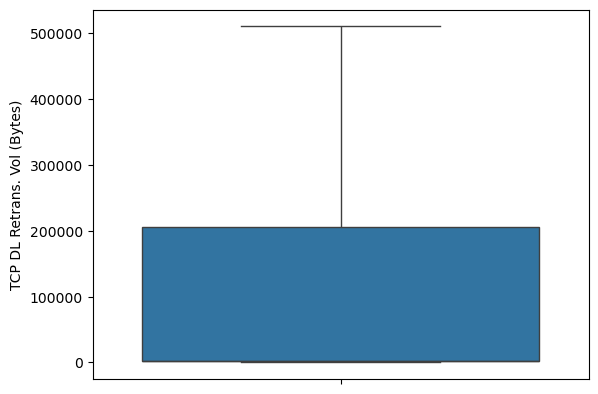

In [73]:
sns.boxplot(df['TCP DL Retrans. Vol (Bytes)'])

<Axes: ylabel='DL TP > 1 Mbps (%)'>

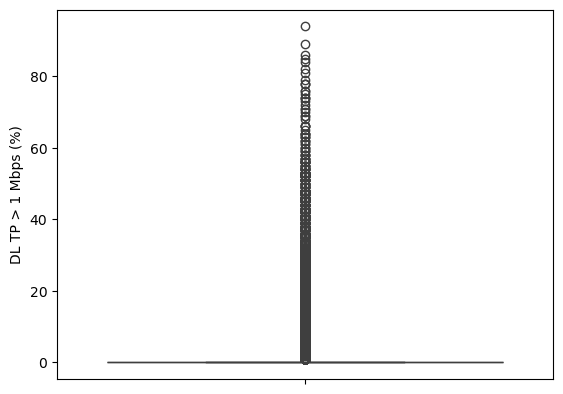

In [75]:
sns.boxplot(df['DL TP > 1 Mbps (%)'])

In [77]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['DL TP > 1 Mbps (%)'])
df['DL TP > 1 Mbps (%)'] = np.where(df['DL TP > 1 Mbps (%)']>upper_limit_iqr,upper_limit_iqr,np.where(df['DL TP > 1 Mbps (%)']<lower_limit_iqr,lower_limit_iqr,df['DL TP > 1 Mbps (%)']))

<Axes: ylabel='DL TP > 1 Mbps (%)'>

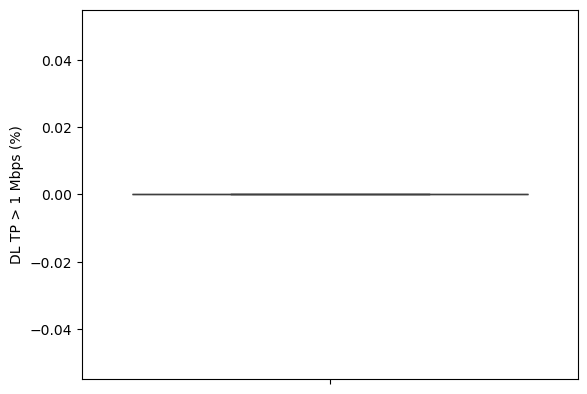

In [79]:
sns.boxplot(df['DL TP > 1 Mbps (%)'])

<Axes: ylabel='HTTP DL (Bytes)'>

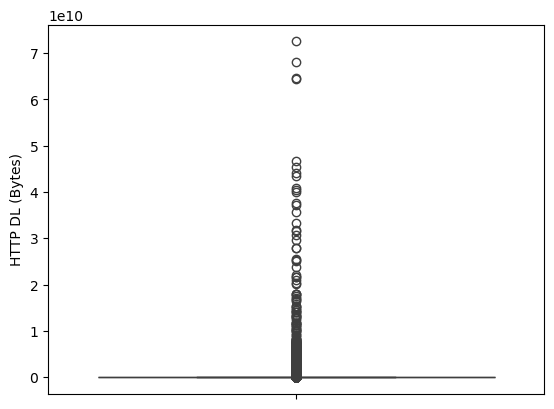

In [81]:
sns.boxplot(df['HTTP DL (Bytes)'])

In [83]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['HTTP DL (Bytes)'])
df['HTTP DL (Bytes)'] = np.where(df['HTTP DL (Bytes)']>upper_limit_iqr,upper_limit_iqr,np.where(df['HTTP DL (Bytes)']<lower_limit_iqr,lower_limit_iqr,df['HTTP DL (Bytes)']))

<Axes: ylabel='HTTP DL (Bytes)'>

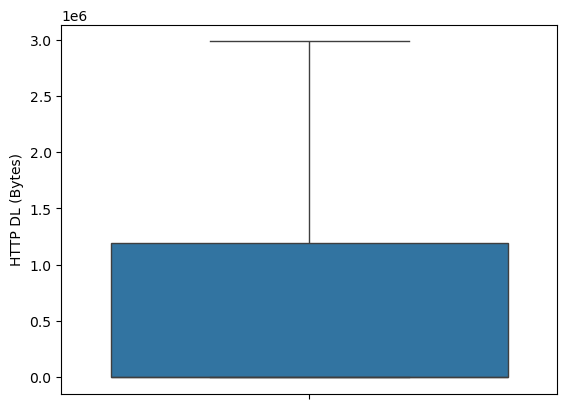

In [85]:
sns.boxplot(df['HTTP DL (Bytes)'])

<Axes: ylabel='HTTP UL (Bytes)'>

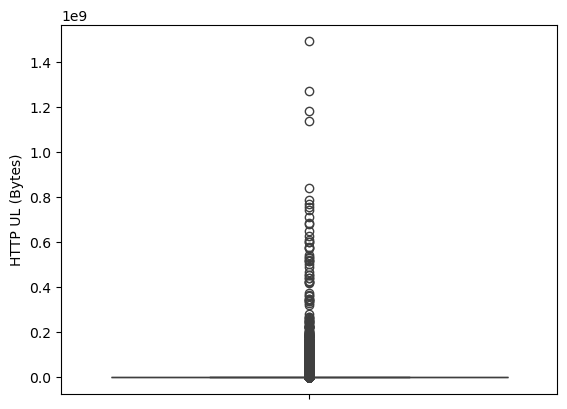

In [87]:
sns.boxplot(df['HTTP UL (Bytes)'])

<Axes: ylabel='Activity Duration DL (ms)'>

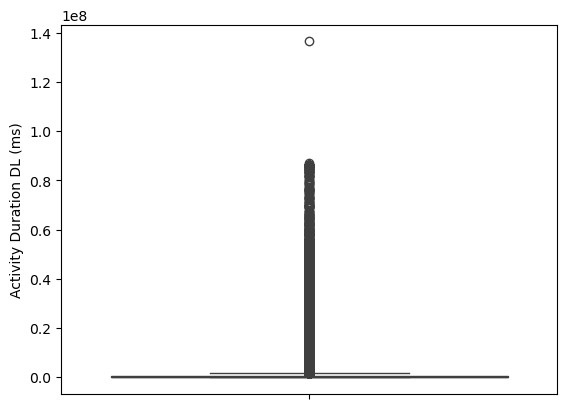

In [89]:
sns.boxplot(df['Activity Duration DL (ms)'])

In [91]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Activity Duration DL (ms)'])
df['Activity Duration DL (ms)'] = np.where(df['Activity Duration DL (ms)']>upper_limit_iqr,upper_limit_iqr,np.where(df['Activity Duration DL (ms)']<lower_limit_iqr,lower_limit_iqr,df['Activity Duration DL (ms)']))

<Axes: ylabel='Activity Duration DL (ms)'>

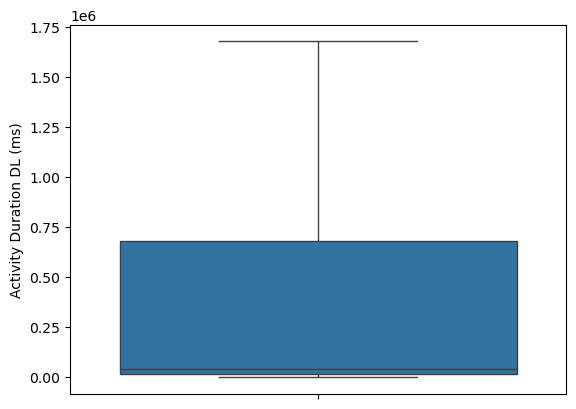

In [93]:
sns.boxplot(df['Activity Duration DL (ms)'])

<Axes: ylabel='Dur. (ms).1'>

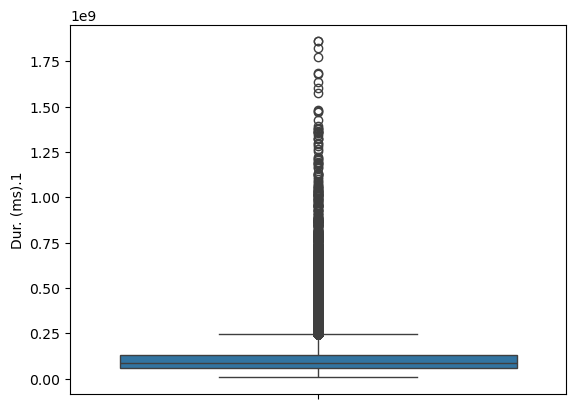

In [95]:
sns.boxplot(df['Dur. (ms).1'])

In [97]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Dur. (ms).1'])
df['Dur. (ms).1'] = np.where(df['Dur. (ms).1']>upper_limit_iqr,upper_limit_iqr,np.where(df['Dur. (ms).1']<lower_limit_iqr,lower_limit_iqr,df['Dur. (ms).1']))

<Axes: ylabel='Dur. (ms).1'>

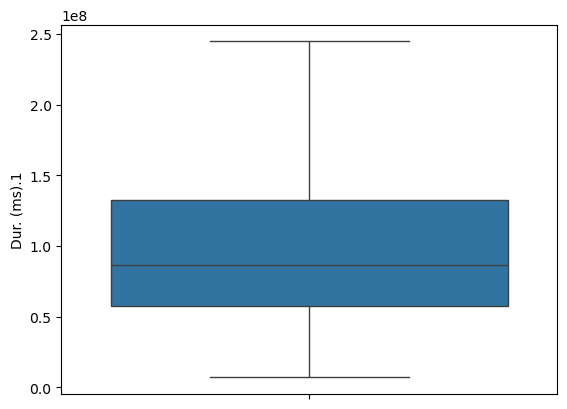

In [99]:
sns.boxplot(df['Dur. (ms).1'])

<Axes: ylabel='Nb of sec with 1250B < Vol UL < 6250B'>

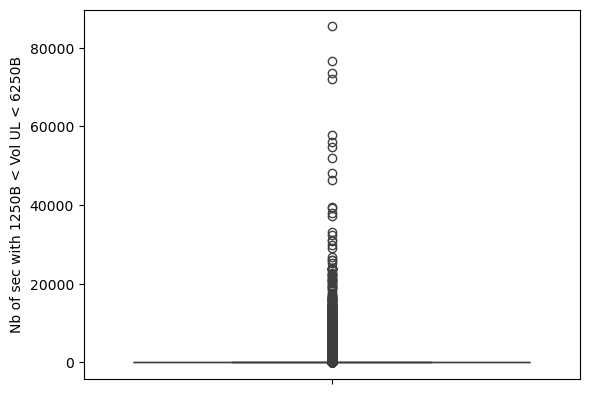

In [101]:
sns.boxplot(df['Nb of sec with 1250B < Vol UL < 6250B'])

In [103]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Nb of sec with 1250B < Vol UL < 6250B'])
df['Nb of sec with 1250B < Vol UL < 6250B'] = np.where(df['Nb of sec with 1250B < Vol UL < 6250B']>upper_limit_iqr,upper_limit_iqr,np.where(df['Nb of sec with 1250B < Vol UL < 6250B']<lower_limit_iqr,lower_limit_iqr,df['Nb of sec with 1250B < Vol UL < 6250B']))

<Axes: ylabel='Nb of sec with 1250B < Vol UL < 6250B'>

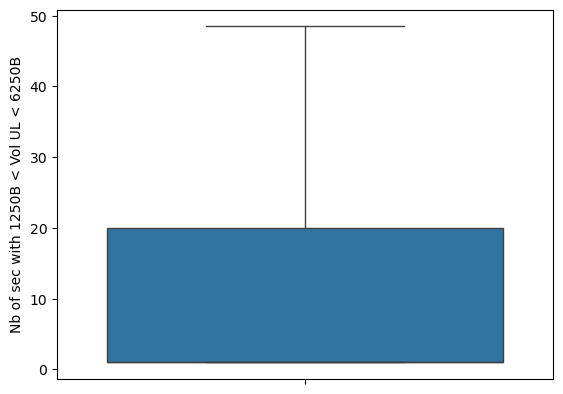

In [105]:
sns.boxplot(df['Nb of sec with 1250B < Vol UL < 6250B'])

<Axes: ylabel='Nb of sec with 31250B < Vol DL < 125000B'>

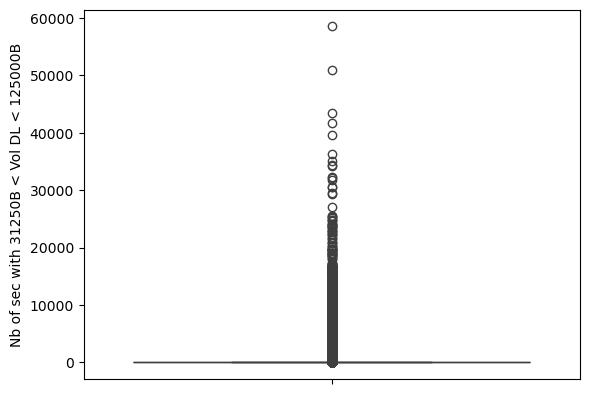

In [107]:
sns.boxplot(df['Nb of sec with 31250B < Vol DL < 125000B'])

In [109]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Nb of sec with 31250B < Vol DL < 125000B'])
df['Nb of sec with 31250B < Vol DL < 125000B'] = np.where(df['Nb of sec with 31250B < Vol DL < 125000B']>upper_limit_iqr,upper_limit_iqr,np.where(df['Nb of sec with 31250B < Vol DL < 125000B']<lower_limit_iqr,lower_limit_iqr,df['Nb of sec with 31250B < Vol DL < 125000B']))

<Axes: ylabel='Nb of sec with 31250B < Vol DL < 125000B'>

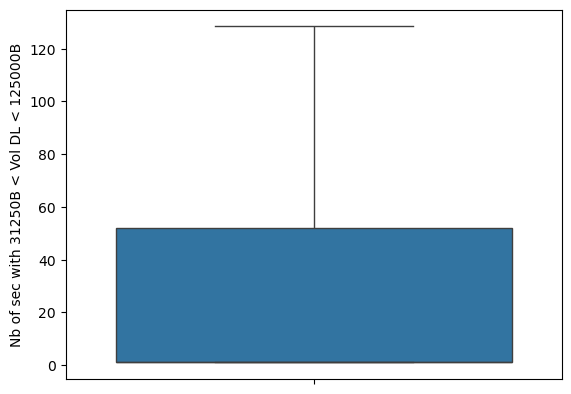

In [111]:
sns.boxplot(df['Nb of sec with 31250B < Vol DL < 125000B'])

<Axes: ylabel='Nb of sec with 6250B < Vol DL < 31250B'>

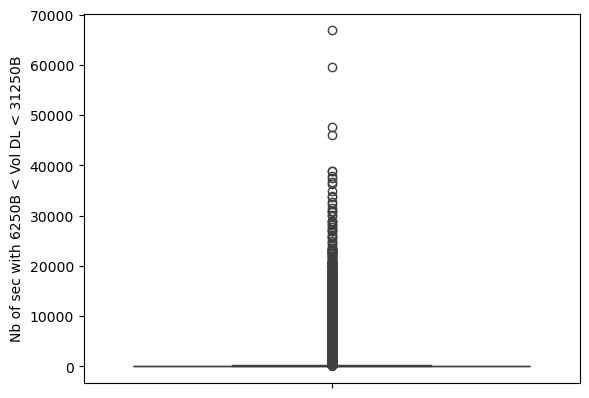

In [113]:
sns.boxplot(df['Nb of sec with 6250B < Vol DL < 31250B'])

In [115]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Nb of sec with 6250B < Vol DL < 31250B'])
df['Nb of sec with 6250B < Vol DL < 31250B'] = np.where(df['Nb of sec with 6250B < Vol DL < 31250B']>upper_limit_iqr,upper_limit_iqr,np.where(df['Nb of sec with 6250B < Vol DL < 31250B']<lower_limit_iqr,lower_limit_iqr,df['Nb of sec with 6250B < Vol DL < 31250B']))

<Axes: ylabel='Nb of sec with 6250B < Vol DL < 31250B'>

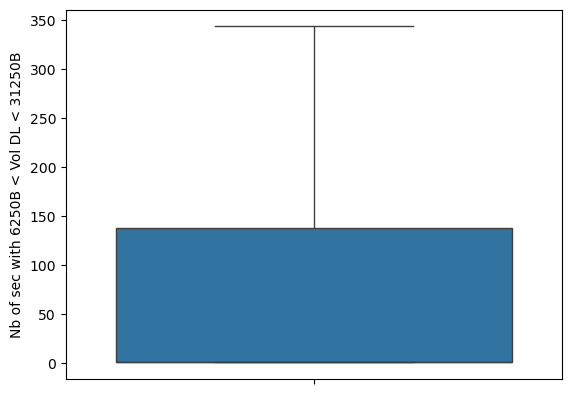

In [117]:
sns.boxplot(df['Nb of sec with 6250B < Vol DL < 31250B'])

<Axes: ylabel='Nb of sec with 125000B < Vol DL'>

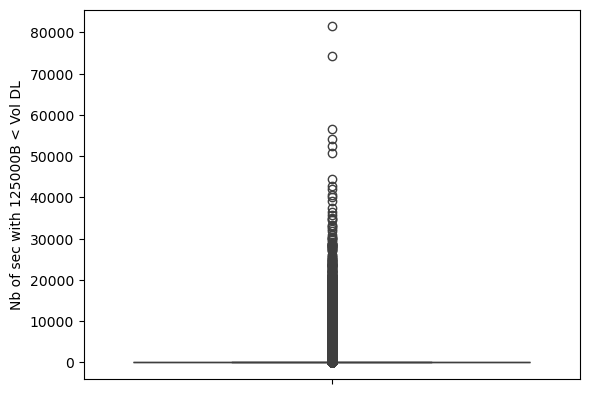

In [119]:
sns.boxplot(df['Nb of sec with 125000B < Vol DL'])

In [121]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Nb of sec with 125000B < Vol DL'])
df['Nb of sec with 125000B < Vol DL'] = np.where(df['Nb of sec with 125000B < Vol DL']>upper_limit_iqr,upper_limit_iqr,np.where(df['Nb of sec with 125000B < Vol DL']<lower_limit_iqr,lower_limit_iqr,df['Nb of sec with 125000B < Vol DL']))

<Axes: ylabel='Nb of sec with 125000B < Vol DL'>

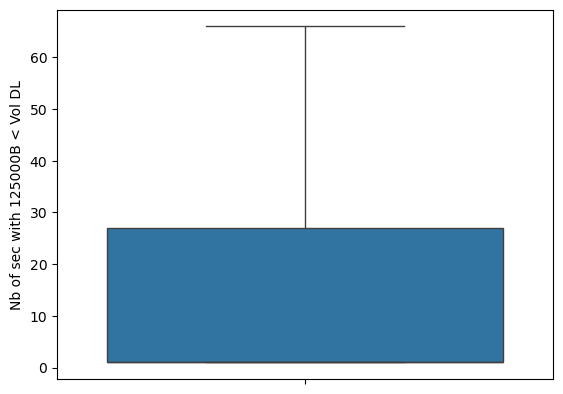

In [123]:
sns.boxplot(df['Nb of sec with 125000B < Vol DL'])

<Axes: ylabel='Total UL (Bytes)'>

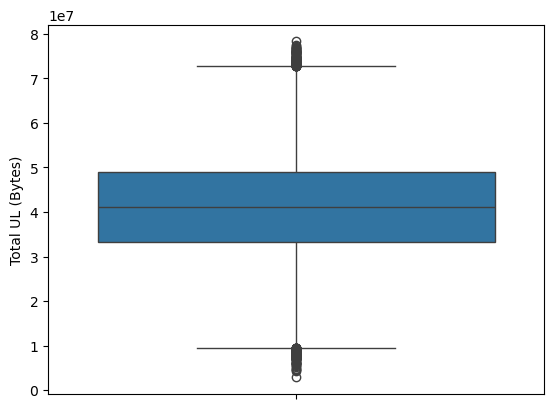

In [125]:
sns.boxplot(df['Total UL (Bytes)'])

In [127]:
def iqr_technique(datacolumn):
    Q1 = np.percentile(datacolumn, 25)
    Q3 = np.percentile(datacolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range
lower_limit_iqr,upper_limit_iqr = iqr_technique(df['Total UL (Bytes)'])
df['Total UL (Bytes)'] = np.where(df['Total UL (Bytes)']>upper_limit_iqr,upper_limit_iqr,np.where(df['Total UL (Bytes)']<lower_limit_iqr,lower_limit_iqr,df['Total UL (Bytes)']))

<Axes: ylabel='Total UL (Bytes)'>

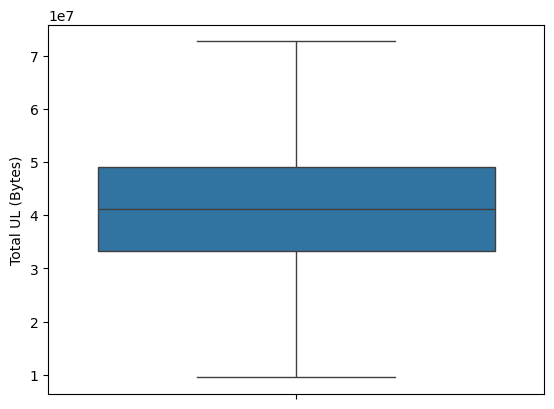

In [129]:
sns.boxplot(df['Total UL (Bytes)'])

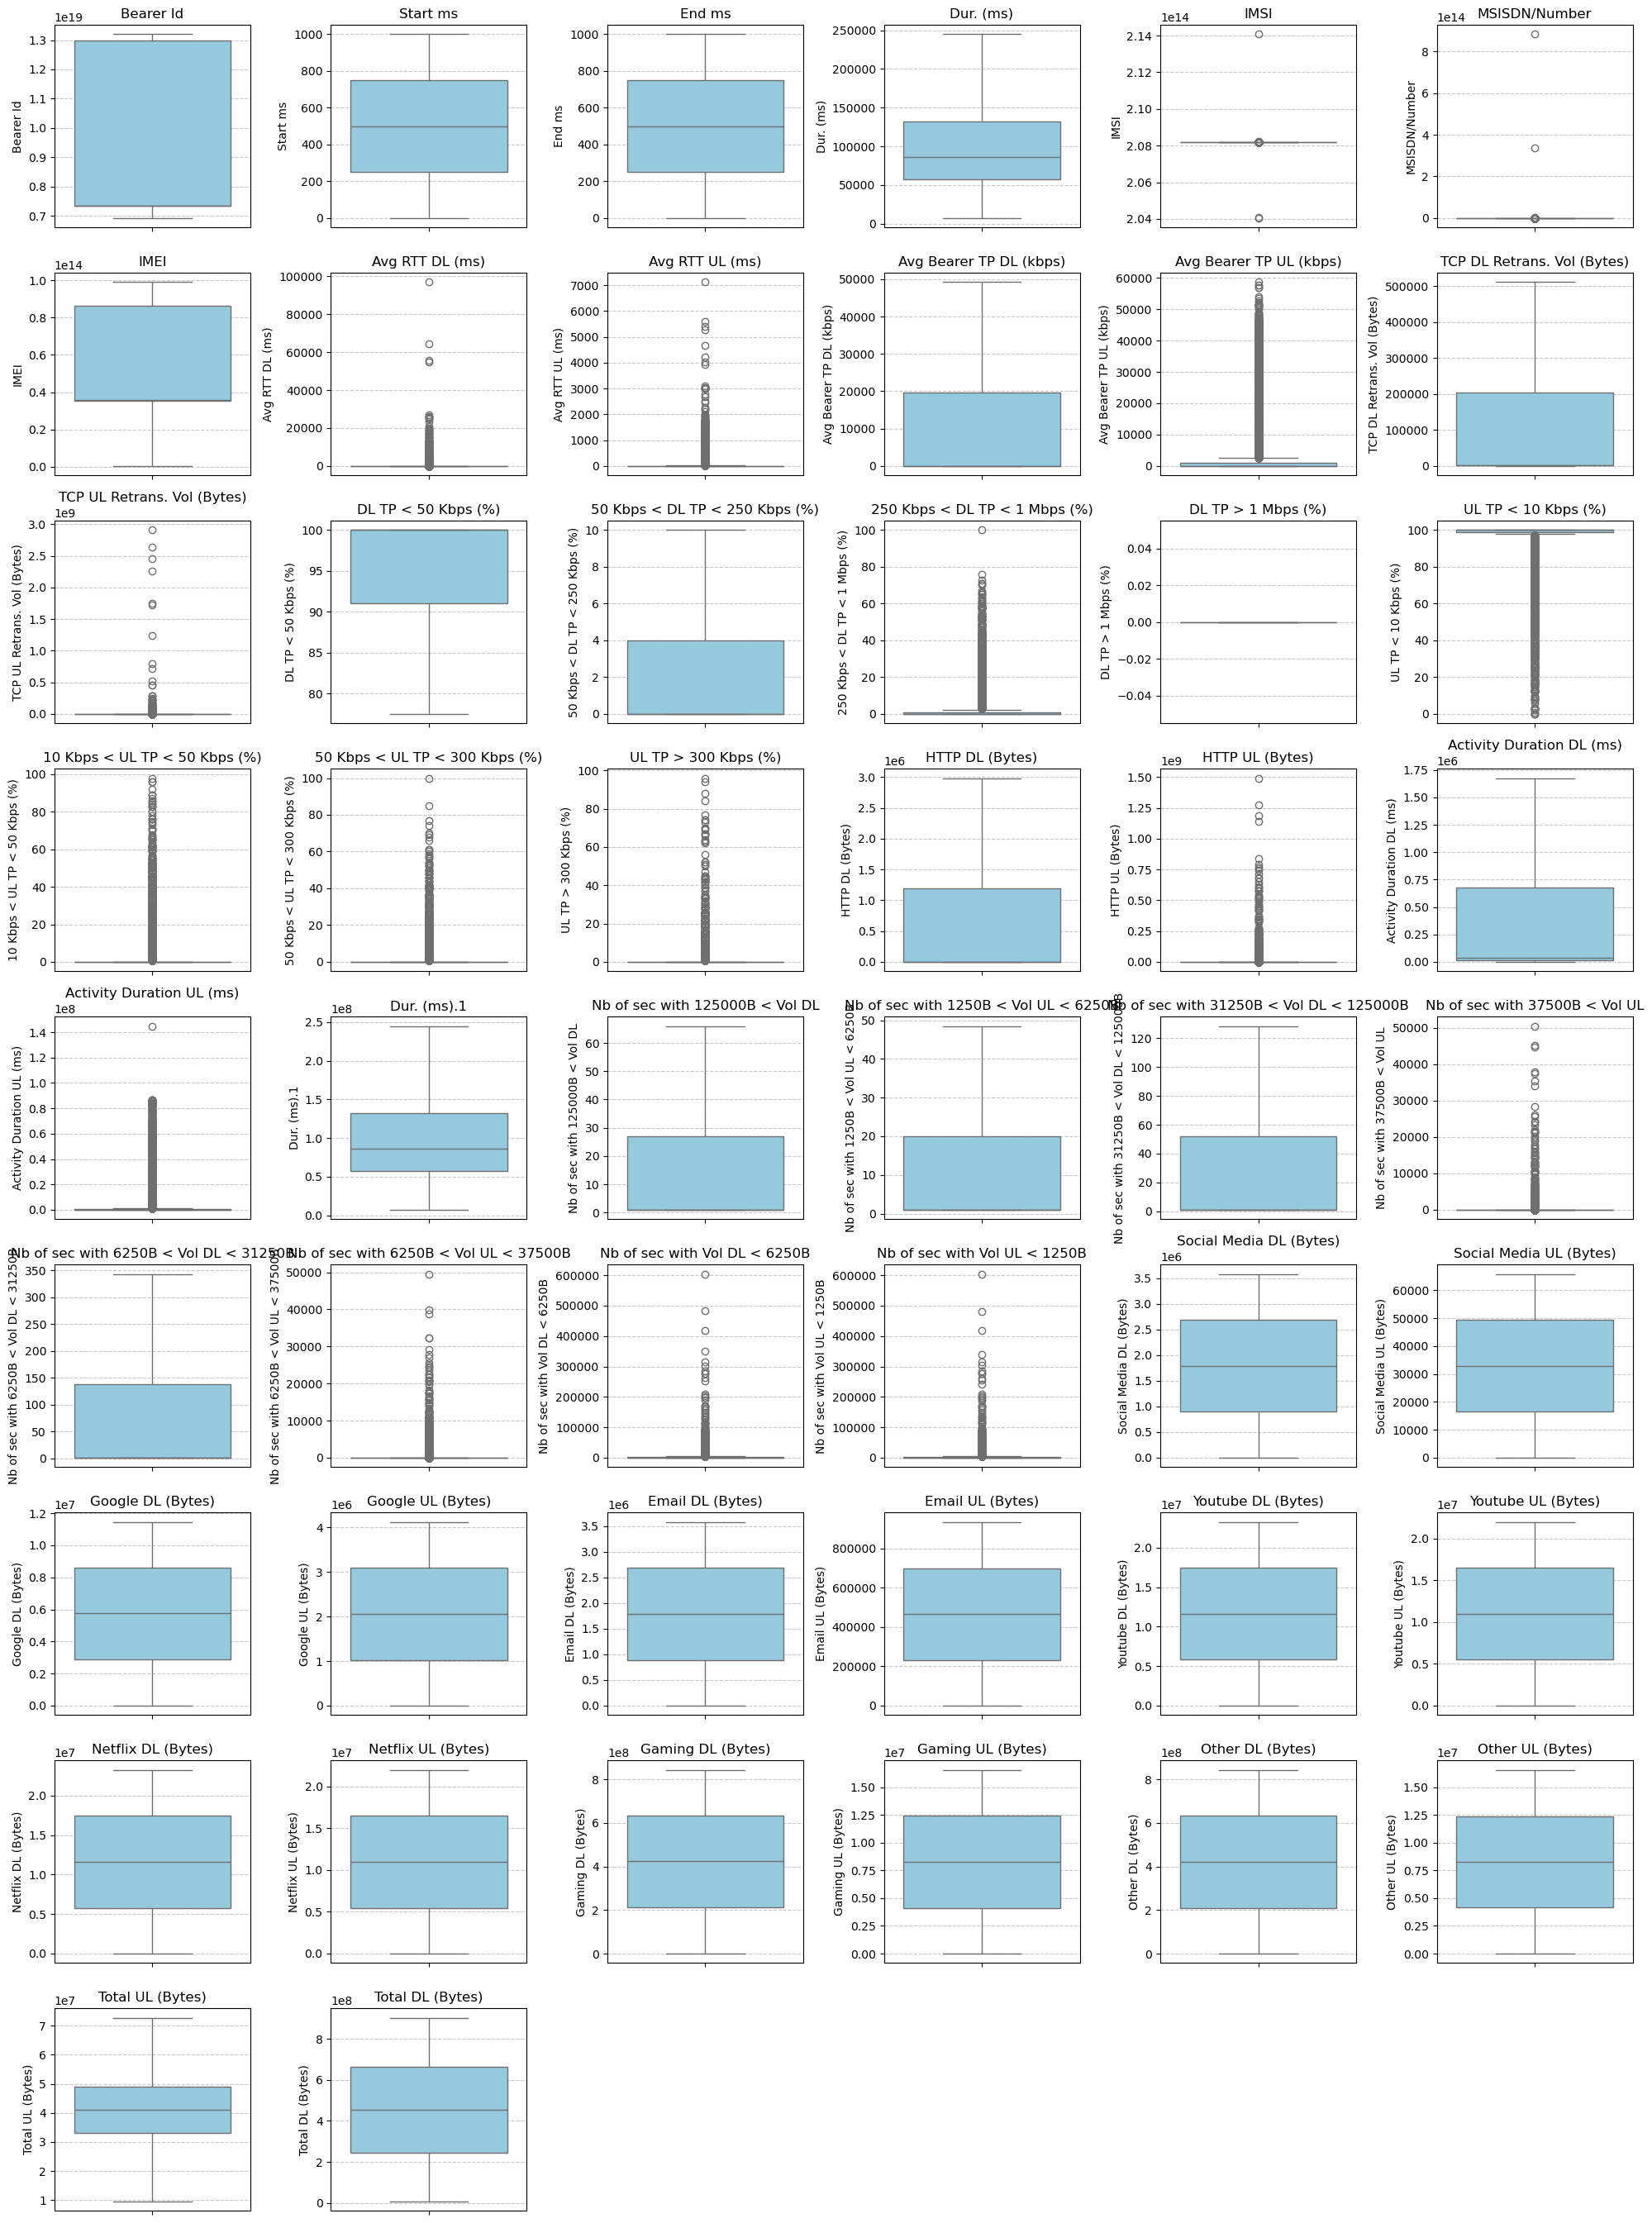

In [131]:
numerical = df.select_dtypes(include=['number']).columns

num_cols = 6  # Number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Compute number of row

plt.figure(figsize=(20, num_rows * 3))  # Adjust figure size dynamically

for i, col in enumerate(numerical, 1):  # Loop through numerical columns
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col], color='skyblue')  # Add color for better visuals
    plt.title(col)
    plt.xlabel('')  # Remove x-axis label for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Display the plots

In [133]:
#task 1
top_10_handsets = df['Handset Manufacturer'].value_counts().nlargest(10)
print("Top 10 Handsets Used by Customers:")
print(top_10_handsets)

Top 10 Handsets Used by Customers:
Handset Manufacturer
Apple                                   60137
Samsung                                 40839
Huawei                                  34423
undefined                                8987
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Name: count, dtype: int64


In [135]:
top_3_handset_manufacturers = df['Handset Manufacturer'].value_counts().nlargest(3)
print("Tope 3 Handset Manufacturers:")
print(top_3_handset_manufacturers)

Tope 3 Handset Manufacturers:
Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [137]:
top_5_handsets_per_manufacturer = df[df['Handset Manufacturer'].isin(top_3_handset_manufacturers.index)]
top_5_handsets_per_manufacturer = top_5_handsets_per_manufacturer['Handset Type'].value_counts().nlargest(5)
print("Top 5 Handsets for Each of the Top 3 Manufacturers:")
print(top_5_handsets_per_manufacturer)

Top 5 Handsets for Each of the Top 3 Manufacturers:
Handset Type
Huawei B528S-23A           20324
Apple iPhone 6S (A1688)     9419
Apple iPhone 6 (A1586)      9023
Apple iPhone 7 (A1778)      6326
Apple iPhone Se (A1723)     5187
Name: count, dtype: int64


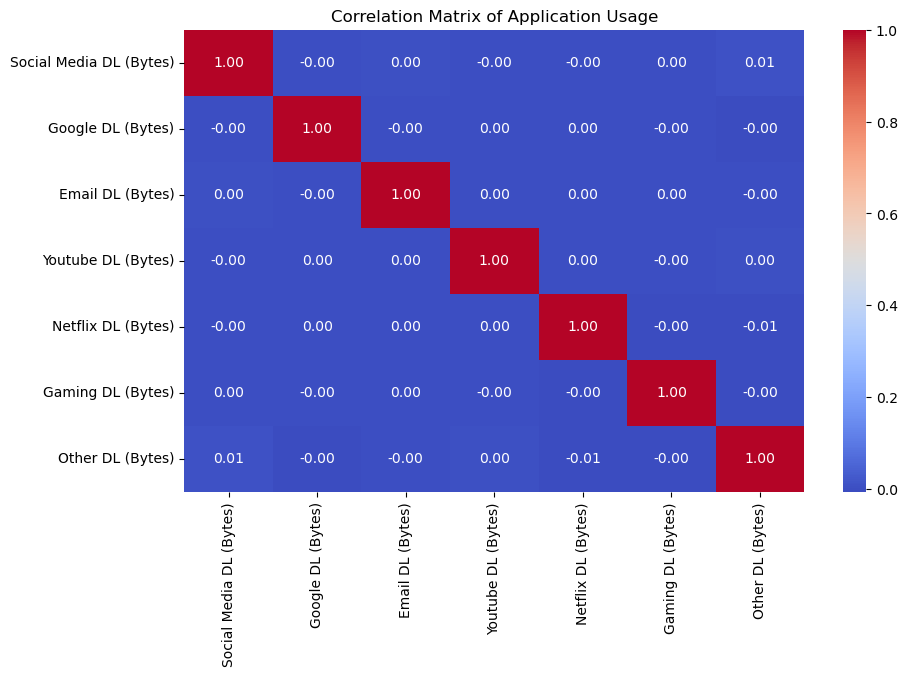

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
apps = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
        'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Compute correlation
correlation_matrix = df[apps].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Application Usage")
plt.show()

In [141]:
df

Bearer Id            Start  Start ms              End  End ms  \
0       1.310000e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.310000e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.310000e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.310000e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.310000e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.280000e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.350000e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.310000e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.310000e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000  7.350000e+18   4/26/2019 7:25     341.0   4/25/2019 0:01   872.0   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0        244912.0  2.082010e+14   3.366496e+10  3.552120e+13   
1        244912.0  2.082020e+14   3.368185e+10  3.579400e+13   
2        244912.0  2.082000e+14   3.376063e+10  3.528150e+13   
3        244912.0  2.082010e+14   3.375034e+10  3.535660e+13   
4        244912.0  2.082010e+14   3.369980e+10  3.540700e+13   
...           ...           ...            ...           ...   
149996    81230.0  2.082020e+14   3.365069e+10  3.548310e+13   
149997    97970.0  2.082020e+14   3.366345e+10  3.566050e+13   
149998    98249.0  2.082020e+14   3.362189e+10  3.572120e+13   
149999    97910.0  2.082020e+14   3.361962e+10  8.618620e+13   
150000    86399.0  2.082020e+14   3.362632e+10  8.637690e+13   

       Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0                9.16E+15  ...          15854611.0          2501332.00   
1                 L77566A  ...          20247395.0         19111729.00   
2                 D42335A  ...          19725661.0         14699576.00   
3                 T21824A  ...          21388122.0         15146643.00   
4                 D88865A  ...          15259380.0         18962873.00   
...                   ...  ...                 ...                 ...   
149996            D20434A  ...          16191667.0         11763428.00   
149997            D10223C  ...          13877234.0          8288284.00   
149998            T51102A  ...          22660510.0          1855903.00   
149999            L88342B  ...           8817106.0          8305402.00   
150000           9.16E+15  ...          11634072.5         11009410.13   

        Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0               8198936.00          9656251.00        278082303.0   
1              18338413.00         17227132.00        608750074.0   
2              17587794.00          6163408.00        229584621.0   
3              13994646.00          1097942.00        799538153.0   
4              17124581.00           415218.00        527707248.0   
...                    ...                 ...                ...   
149996         17883703.00         19678161.00        526609673.0   
149997         19350146.00         21293148.00        626893062.0   
149998          9963942.00          5065760.00        553539484.0   
149999          3322253.00         13172589.00        352536971.0   
150000         11626851.72         11001754.82        422044702.6   

        Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  \
0            1.434415e+07       171744450.0      8.814393e+06   
1            1.170709e+06       526904238.0      1.505514e+07   
2            3.956300e+05       410692588.0      4.215763e+06   
3            1.084972e+07       749039933.0      1.279728e+07   
4            3.529801e+06       550709500.0      1.391032e+07   
...                   ...               ...               ...   
149996       9.197207e+06         3264510.0      1.348742e+07   
149997       4.735033e+06       712180387.0      2.457758e+06   
149998       1.339432e+07 

In [145]:
df["Total_Data_Bytes"] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]

# Total session time in seconds
df["Duration_s"] = df["Dur. (ms)"] / 1000

C:\Users\Admin\AppData\Local\Temp\ipykernel_3172\1138843660.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Duration_decile', y='sum', data=decile_data_usage, palette='Blues_d')


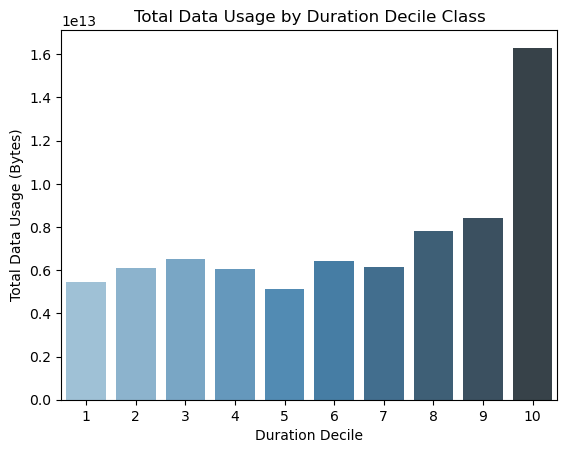

In [147]:
# Make sure 'Dur. (ms)' is clean
df['Dur. (ms)'] = df['Dur. (ms)'].fillna(df['Dur. (ms)'].mean())

# Calculate total data (download + upload)
df['Total_Data_Bytes'] = df['Total DL (Bytes)'] + df['Total UL (Bytes)']

# Aggregate per user
user_data = df.groupby("MSISDN/Number").agg({
    "Dur. (ms)": "sum",
    "Total_Data_Bytes": "sum"
}).reset_index()

# Create decile classes based on total duration
user_data['Duration_decile'] = pd.qcut(user_data['Dur. (ms)'], 10, labels=False) + 1

# Compute total data per decile
decile_data_usage = user_data.groupby('Duration_decile')['Total_Data_Bytes'].agg(['sum', 'mean', 'count']).reset_index()

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Duration_decile', y='sum', data=decile_data_usage, palette='Blues_d')
plt.title('Total Data Usage by Duration Decile Class')
plt.xlabel('Duration Decile')
plt.ylabel('Total Data Usage (Bytes)')
plt.show()

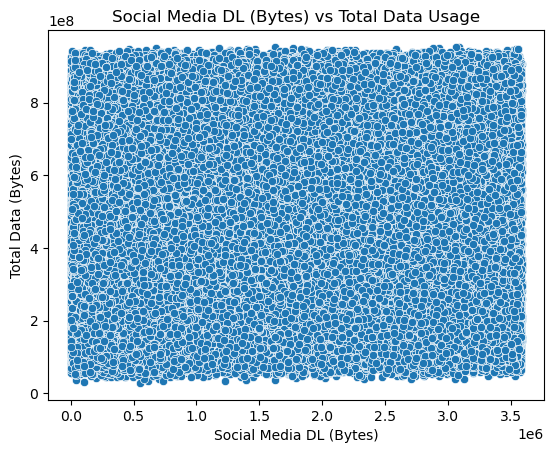

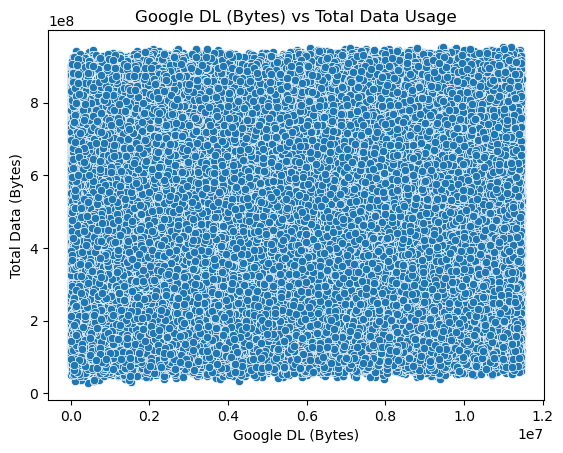

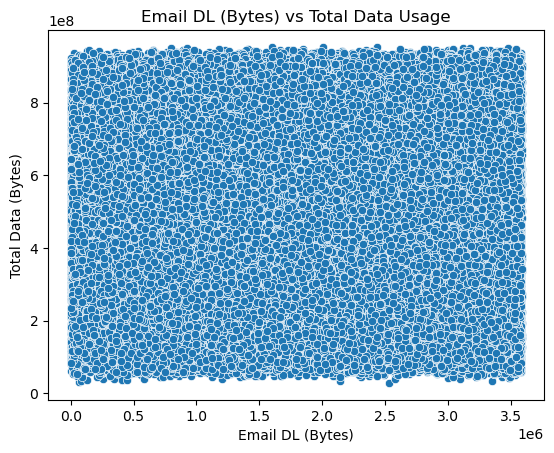

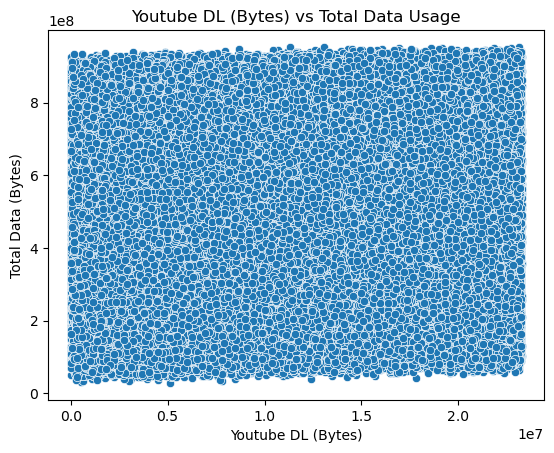

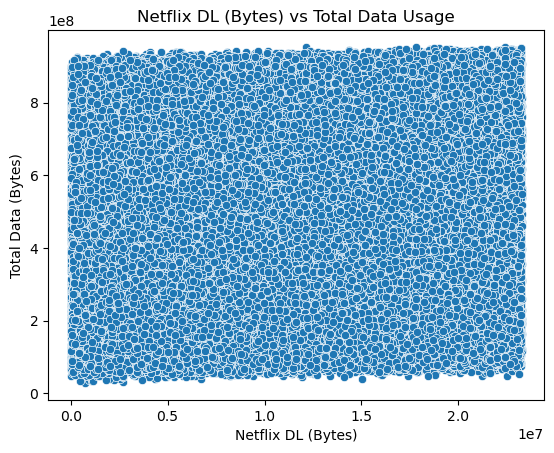

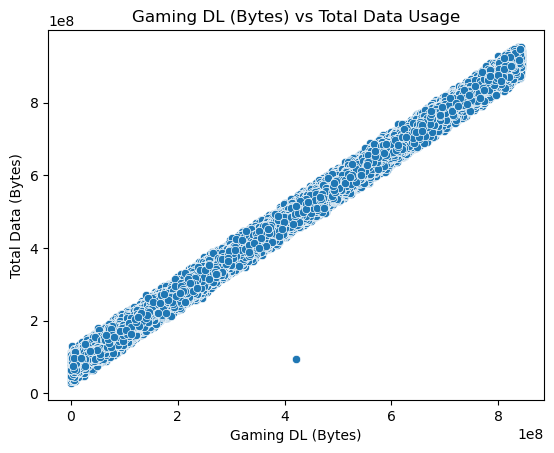

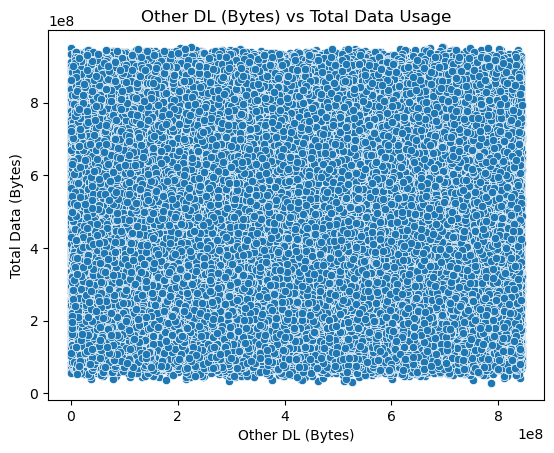

In [149]:
# Bivariate analysis
# Scatter plot for each app against total data usage
df["Total_Data"] = df["Total DL (Bytes)"] + df["Total UL (Bytes)"]

for col in apps:
    sns.scatterplot(x=df[col], y=df["Total_Data"])
    plt.title(f"{col} vs Total Data Usage")
    plt.xlabel(col)
    plt.ylabel("Total Data (Bytes)")
    plt.show()

In [151]:
# Aggregate per user
agg_user = df.groupby(["MSISDN/Number"]).agg({
    "Bearer Id": "count",
    "Dur. (ms)": "sum",
    "Total DL (Bytes)": "sum",
    "Total UL (Bytes)": "sum"
}).reset_index()

agg_user.rename(columns={
    "Bearer Id": "xDR_session_count",
    "Dur. (ms)": "Total_Duration_ms"
}, inplace=True)

agg_user["Total_Data"] = agg_user["Total DL (Bytes)"] + agg_user["Total UL (Bytes)"]

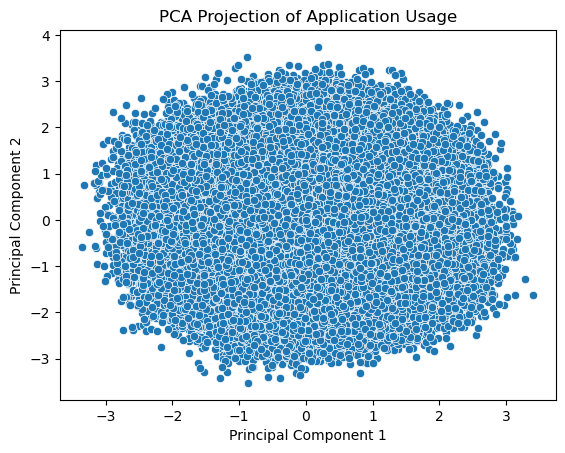

In [153]:
#PC1 (Principal Component 1) distinguishes users with high data usage across all platforms.
##PC2 may highlight contrast between streaming (Netflix/YouTube) vs. search/work (Google/Email).
#PCA helps us reduce complexity while still understanding user usage patterns.
#These two components can be used to cluster users and design targeted marketing or plans.

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize
X = df[apps].fillna(data1[apps].mean())  # Replace NaNs
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

data1['PCA1'] = X_pca[:, 0]
data1['PCA2'] = X_pca[:, 1]

# Scatter Plot
sns.scatterplot(x=data1['PCA1'], y=data1['PCA2'])
plt.title("PCA Projection of Application Usage")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [155]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalize data
features = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
            'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

X = df[features]
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to original data
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

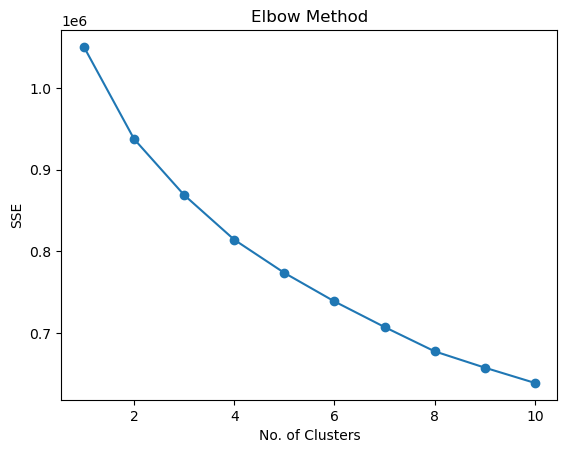

In [157]:
#Scatter Plot + Elbow for KMeans

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE")
plt.show()

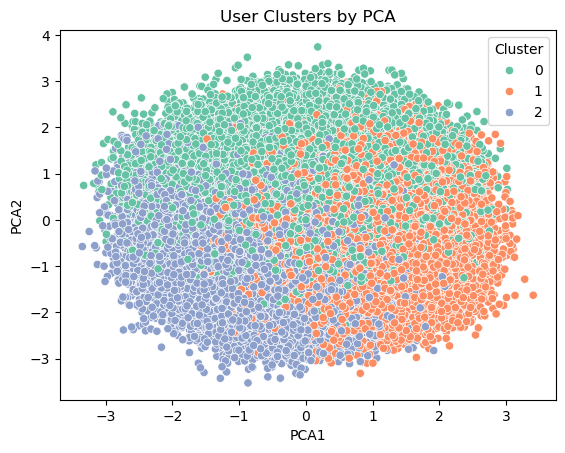

In [159]:
# Apply KMeans with optimal k (say 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster info
df["Cluster"] = clusters

# Visualize clusters
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("User Clusters by PCA")
plt.show()